### Project1. 당뇨병 예측모델

In [1]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
# 데이터 로드 및 변수 분리
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [19]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
# 학습/테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size=0.2, random_state=42)

In [6]:
# 가중치와 편차 할당
W = np.random.rand(10)
b = np.random.rand()

In [7]:
# 모델 함수 정의
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
#손실계산 함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    loss = ((predictions - y) ** 2).mean() 
    return loss

In [9]:
# 기울기 구하는 함수 정의
def gradient(X, W, b, y):
    N = len(y)
    predictions = model(X, W, b)
    #X벡터 전치 후 예측값-실제값과 내적
    dW = 1/N * 2 * X.T.dot(predictions - y)
    db = 2*(predictions - y).mean()
    
    return dW, db

In [54]:
#학습률 할당
lr = 8e-2

In [55]:
W = np.ones(X_train.shape[1])
b = 0

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)

print('최종 가중치 : ', W)
print('최종 편차 : ', b)
print('최종 손실값(MSE) : ', L)

최종 가중치 :  [  58.53989718  -81.84036401  347.59782287  241.32517203    5.66026016
  -29.11743431 -176.55730278  148.48490205  276.38359002  148.08802969]
최종 편차 :  151.9144538837788
최종 손실값(MSE) :  3184.974708064562


In [56]:
# test 성능 확인

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('최종 손실값(MSE) : ', mse)

최종 손실값(MSE) :  2947.370137733242


In [14]:
import matplotlib.pyplot as plt

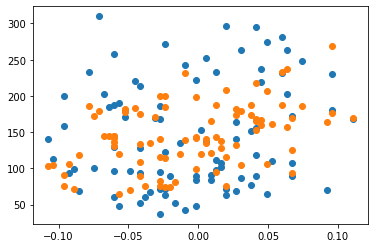

In [57]:
# 예측 결과 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()